In [20]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd

from sklearn.pipeline import Pipeline
from sklearn.datasets import make_classification
from sklearn.model_selection import RandomizedSearchCV
from sklearn.impute import SimpleImputer
import lightgbm

from probatus.feature_elimination import ShapRFECV

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [11]:
def make_X_y():
    X, y = make_classification(n_samples=500)
    X = pd.DataFrame(X)
    X.columns = ['var_'+str(i) for i in range(0, X.shape[1])]
    y = pd.Series(y)
    
    return X, y

X, y = make_X_y()

In [12]:
clf = lightgbm.LGBMClassifier(max_depth=5, n_jobs=2)
param_grid = {'n_estimators': [5, 7, 10], 'num_leaves': [3, 5, 7, 10]}
search = RandomizedSearchCV(clf, param_grid, cv=5, scoring='roc_auc', refit=False)

In [17]:
shap_elimination = ShapRFECV(search, step=0.25, cv=5, scoring='roc_auc', n_jobs=4)
report = shap_elimination.fit_compute(X, y)

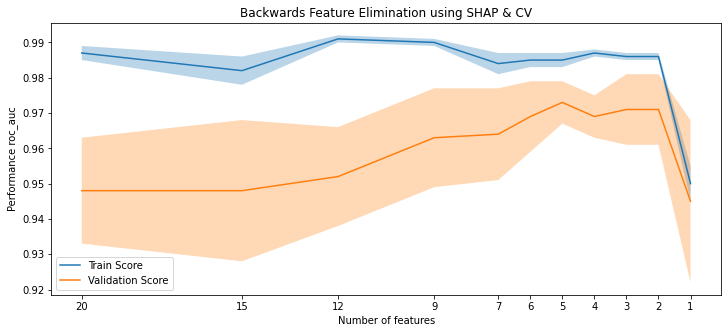

<AxesSubplot:title={'center':'Backwards Feature Elimination using SHAP & CV'}, xlabel='Number of features', ylabel='Performance roc_auc'>

In [18]:
shap_elimination.plot(figsize=(12, 5))

In [19]:
report

,num_features,features_set,eliminated_features,train_metric_mean,train_metric_std,val_metric_mean,val_metric_std
1,20,"[var_0, var_1, var_2, var_3, var_4, var_5, var...","[var_10, var_4, var_0, var_17, var_7]",0.987,0.002,0.948,0.015
2,15,"[var_3, var_14, var_15, var_9, var_16, var_1, ...","[var_9, var_1, var_18]",0.982,0.004,0.948,0.020
3,12,"[var_3, var_14, var_15, var_16, var_12, var_5,...","[var_8, var_5, var_14]",0.991,0.001,0.952,0.014
4,9,"[var_3, var_16, var_15, var_12, var_11, var_6,...","[var_12, var_11]",0.990,0.001,0.963,0.014
5,7,"[var_3, var_16, var_15, var_6, var_13, var_2, ...",[var_13],0.984,0.003,0.964,0.013
6,6,"[var_3, var_16, var_15, var_6, var_2, var_19]",[var_15],0.985,0.002,0.969,0.010
7,5,"[var_3, var_16, var_6, var_2, var_19]",[var_16],0.985,0.002,0.973,0.006
8,4,"[var_3, var_2, var_6, var_19]",[var_6],0.987,0.001,0.969,0.006
9,3,"[var_3, var_2, var_19]",[var_19],0.986,0.001,0.971,0.010
10,2,"[var_3, var_2]",[var_3],0.986,0.001,0.971,0.010


In [46]:
X

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19
0,-1.221434,0.339370,-0.401467,0.817372,-0.773655,0.055639,1.254478,0.754502,1.958024,0.853865,0.516062,0.283482,0.009222,1.489771,0.857199,0.844919,-0.430149,0.270722,0.376171,-1.010099
1,1.354280,-0.967673,0.503430,1.374737,-0.802158,1.890777,-0.449543,1.187813,1.025354,-1.240363,0.385385,1.293343,-0.150393,0.043625,-0.483706,1.980229,-0.353750,2.204299,0.836628,1.040954
2,-1.180786,-0.595051,0.379158,-0.920135,0.289583,-1.039491,0.271012,-0.897248,-1.311701,0.133856,-0.199209,-1.331300,0.897307,-1.041454,0.421227,0.177412,0.461398,0.181160,-0.034081,0.967905
3,-0.650184,-0.391353,-0.261190,-0.579310,0.646666,1.293672,1.047634,0.838252,0.279084,-1.227335,0.756060,-1.282946,0.384144,-0.758755,-0.516321,1.185224,0.133685,-0.564388,0.687438,-0.552663
4,-1.241386,0.709332,-0.428844,1.436514,0.623603,0.360125,1.145663,0.633043,-0.503134,2.087307,-0.082928,0.482906,1.826061,-1.501691,-0.085372,-0.592807,-0.669175,-0.964412,-0.300202,-1.131965
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,-0.461187,-2.088253,-0.355069,-0.011415,-0.368538,-0.693262,0.794574,0.052031,-1.000111,-0.064738,0.183639,-1.133239,-0.285267,0.041353,-0.214924,-0.338412,-0.107128,0.669465,-0.619030,-0.824299
496,-0.135304,-2.082702,0.009460,1.220254,0.041965,2.335917,-0.768778,-0.644759,-0.862063,0.493926,-0.916007,0.011153,-1.487582,-0.563002,-0.013336,1.163612,-0.451199,-2.189690,0.003424,-0.092772
497,-1.516643,-1.095121,-0.028194,-0.490954,0.736889,-1.100074,0.199470,-1.407064,-1.201427,-0.206416,-1.027505,-0.000356,-0.619648,0.507387,-0.326508,1.154633,0.173885,1.450909,-1.361664,-0.019365
498,0.626450,-0.466869,0.341750,1.238289,1.501665,1.091956,-0.053485,-0.545313,1.331403,0.435876,0.418454,-1.862912,-2.609539,0.768479,0.286638,-0.427663,-0.353680,1.379727,0.753800,0.677954


In [51]:
model = Pipeline(
    steps = [
        ("shap", ShapRFESelector(
            search, step=0.25, cv=5, min_features_to_select=5,scoring='roc_auc', n_jobs=4)
        )
    ]
)

In [52]:
X_transformed = model.fit_transform(X=X, y=y)

In [54]:
X_transformed.shape

(500, 5)

In [55]:
model = Pipeline(
    steps = [
        ("impute", SimpleImputer(strategy="mean")),
        ("shap", ShapRFESelector(
            search, step=0.25, cv=5, min_features_to_select=5,scoring='roc_auc', n_jobs=4)
        )
    ]
)

In [56]:
X_transformed = model.fit_transform(X=X, y=y)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [66]:
from feature_engine.imputation import MeanMedianImputer

model = Pipeline(
    steps = [
        ("Impute", MeanMedianImputer(imputation_method="mean")),
        ("shap", ShapRFESelector(
            search, step=0.25, cv=5, min_features_to_select=5, scoring='roc_auc', n_jobs=4)
        )
    ]
)

In [67]:
X_transformed = model.fit_transform(X=X, y=y)

In [68]:
X_transformed.shape

(500, 5)

In [73]:
model['shap'].shap_selection.report_df

,num_features,features_set,eliminated_features,train_metric_mean,train_metric_std,val_metric_mean,val_metric_std
1,20,"[var_0, var_1, var_2, var_3, var_4, var_5, var...","[var_18, var_17, var_4, var_0, var_7]",0.984,0.003,0.948,0.014
2,15,"[var_3, var_14, var_15, var_9, var_16, var_1, ...","[var_9, var_1, var_10]",0.982,0.004,0.948,0.020
3,12,"[var_3, var_14, var_15, var_16, var_12, var_5,...","[var_8, var_5, var_14]",0.991,0.001,0.952,0.014
4,9,"[var_3, var_16, var_15, var_12, var_11, var_6,...","[var_12, var_11]",0.988,0.002,0.961,0.012
5,7,"[var_3, var_16, var_15, var_6, var_13, var_2, ...",[var_13],0.984,0.003,0.964,0.013
6,6,"[var_3, var_16, var_15, var_6, var_2, var_19]",[var_15],0.985,0.002,0.969,0.010
7,5,"[var_3, var_16, var_6, var_2, var_19]",[],0.985,0.002,0.973,0.006
